1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

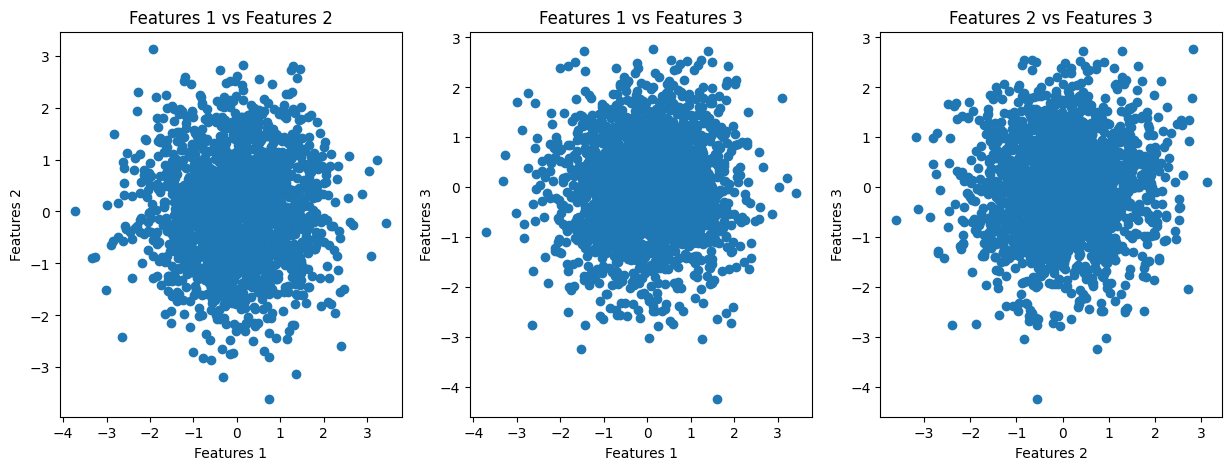

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
# https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
file_name = "regression_generated.csv"
df = pd.read_csv(file_name)
#print(df.head())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(df['features_1'], df['features_2'])
axs[0].set_title('Features 1 vs Features 2')
axs[0].set_xlabel('Features 1')
axs[0].set_ylabel('Features 2')

axs[1].scatter(df['features_1'], df['features_3'])
axs[1].set_title('Features 1 vs Features 3')
axs[1].set_xlabel('Features 1')
axs[1].set_ylabel('Features 3')

axs[2].scatter(df['features_2'], df['features_3'])
axs[2].set_title('Features 2 vs Features 3')
axs[2].set_xlabel('Features 2')
axs[2].set_ylabel('Features 3')
plt.show()



Looking at all the different combinations of features, there is no sign of correlation between the three features. All the plots have a circular pattern, thus knowing the true value of one of the features does not give any valuable information about one of the other features. 

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

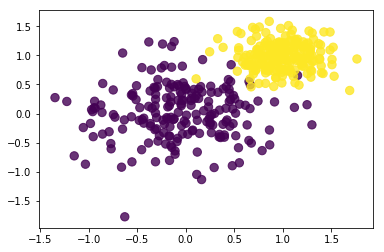

In [140]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

Text(0, 0.5, 'Y-axis')

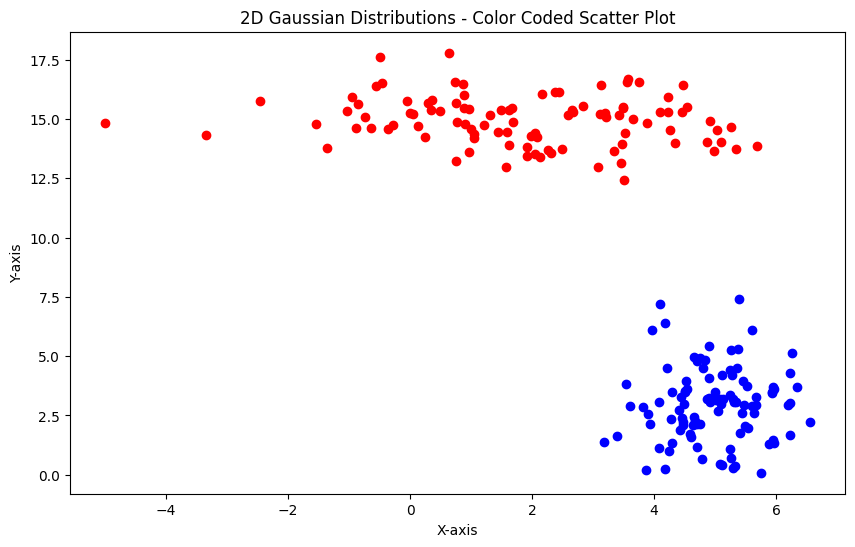

In [141]:
import numpy as np
category_one = np.random.normal([5, 3], [0.7, 1.5], (100, 2))
category_two = np.random.normal([2, 15], [1.9, 1.1], (100, 2))

plt.figure(figsize=(10, 6))
plt.scatter(category_one[:, 0], category_one[:, 1], c='blue', label='Category One')
plt.scatter(category_two[:, 0], category_two[:, 1], c='red', label='Category Two')
plt.title('2D Gaussian Distributions - Color Coded Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

   residuals  distances
0       1.10       16.0
1      -1.95        6.3
2      -7.20        3.4
3      -4.15        8.4
4      -6.59        1.7
By looking at the plot it seems like there is no correlation between the two variables.
The plot shows that knowing the value of one of the variables does not give any information about the value of other one.


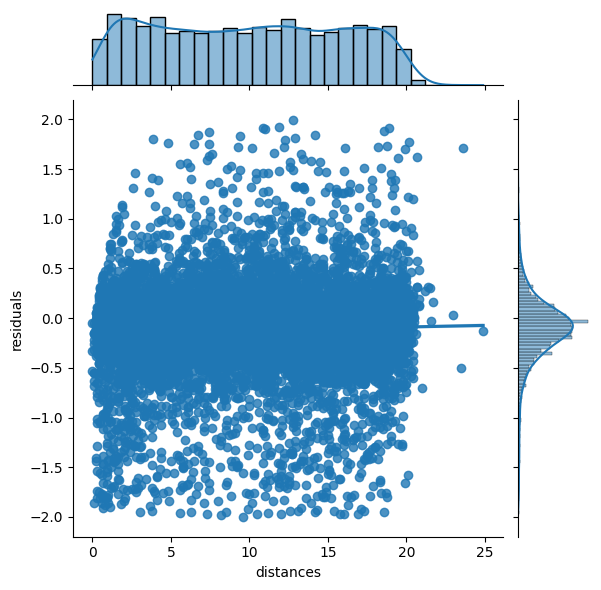

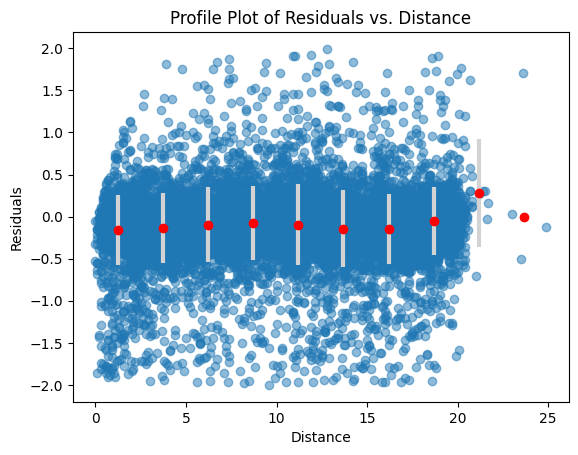

In [142]:
# 'https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl' -P data/
import pickle
import seaborn

filename = "residuals_261.pkl"
with open(filename, 'rb') as infile:
    residuals_data = pickle.load(infile).item()

df = pd.DataFrame(residuals_data)
print(df.head())
df_filtered = df[abs(df['residuals']) < 2]

seaborn.jointplot(x='distances', y='residuals', data=df_filtered, kind='reg')

print("""By looking at the plot it seems like there is no correlation between the two variables.
The plot shows that knowing the value of one of the variables does not give any information about the value of other one.""")

num_bins = 10
bin_edges = np.linspace(df_filtered['distances'].min(), df_filtered['distances'].max(), num_bins + 1)
x = (bin_edges[:-1] + bin_edges[1:]) / 2
y = np.zeros(num_bins)
err_y = np.zeros(num_bins)

for i in range(num_bins-1):
    bin_mask = ((df_filtered['distances'] >= x[i]) & (df_filtered['distances'] < x[i+1]))
    bin_data = df_filtered.loc[bin_mask, 'residuals']
    y[i] = bin_data.mean()
    err_y[i] = bin_data.std()


plt.figure()
plt.scatter(df_filtered['distances'], df_filtered['residuals'], alpha=0.5)
plt.errorbar(x, y, yerr=err_y, fmt='o', color='red', ecolor='lightgray', elinewidth=3, capsize=0)
plt.xlabel('Distance')
plt.ylabel('Residuals')
plt.title('Profile Plot of Residuals vs. Distance')
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


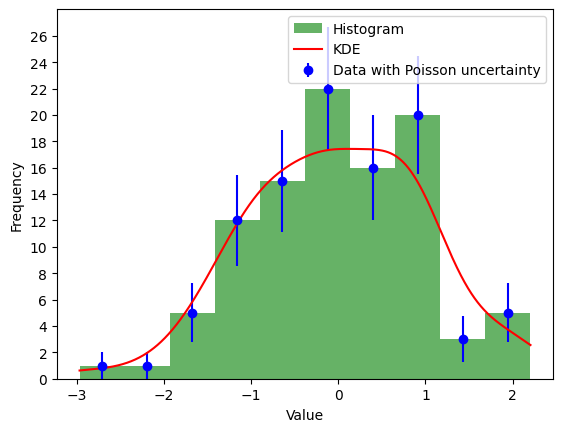

In [143]:
import scipy

N = 100
x = np.random.normal(0, 1, N)
bins = int(np.sqrt(N))
hist_data, bin_edges, _ = plt.hist(x, bins=bins, alpha=0.6, color='g', label='Histogram')

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
errors = np.sqrt(hist_data) 
plt.errorbar(bin_centers, hist_data, yerr=errors, fmt='o', color='b', label='Data with Poisson uncertainty')

plt.yticks(range(0, int(max(hist_data))+5, 2))
plt.ylabel('Frequency')
plt.xlabel('Value')


sigma = 1.06 * x.std() * np.power(N, -1/5)
x_range = np.linspace(x.min(), x.max(), 1000)
x_gaussian = [scipy.stats.norm.pdf(x_range, loc=i, scale=sigma) for i in x]
kde = np.sum(x_gaussian, axis=0)

hist_integral = scipy.integrate.trapz(hist_data, x=bin_centers)
kde_integral = scipy.integrate.trapz(kde, x=x_range)
kde_normalized = kde * (hist_integral / kde_integral)

plt.plot(x_range, kde_normalized, color='r', label='KDE')

plt.legend()
plt.show()